In [108]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

$y[k] = \Sigma^{N-1}_{n=0} x[k]e^{(-j2\pi kn)/N}$

We can express this using matrices: $\\$
$x = [x_1 ... x_N]\\$
$n = [1...N]\\$
$k = [1...N]^T\\$
$y = x \cdot e^{-2j \cdot \pi \cdot k \cdot n /N}$

In [88]:
def DFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N,1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M,x)

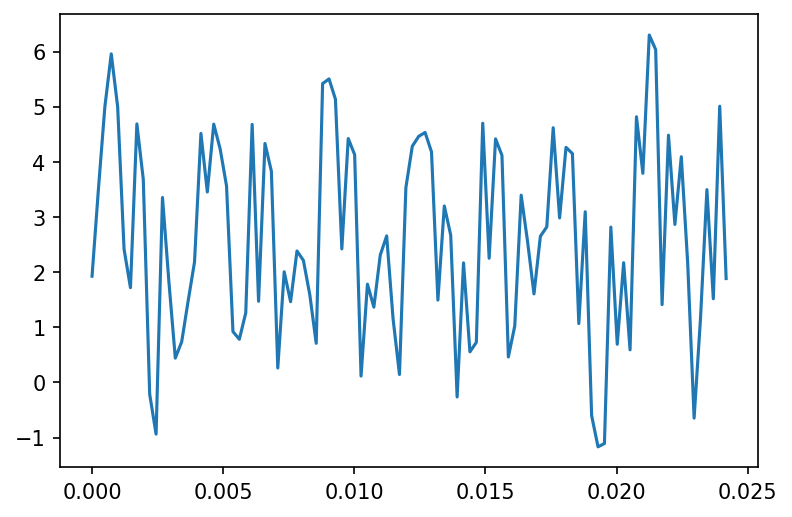

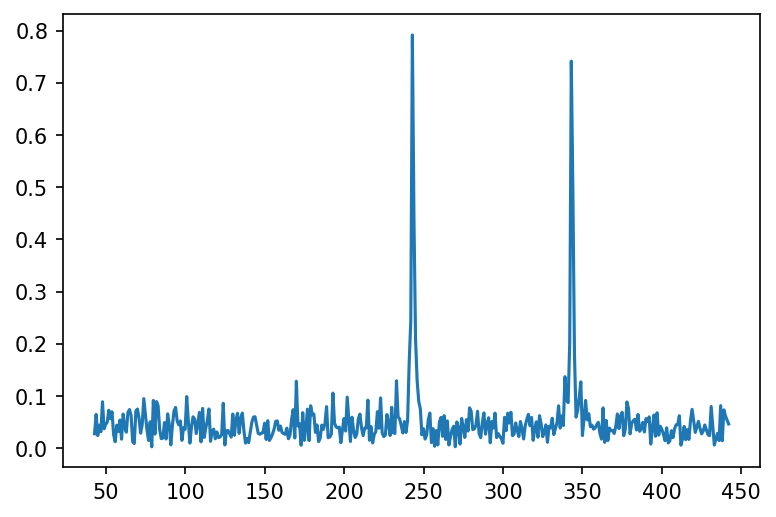

In [116]:
offset = 200

f = 243.3
fs = 4096
L  = 1;

t = np.linspace(0,L,fs*L)
noise = random.rand(fs*L)*5
s = np.sin(t*2*np.pi*f) + np.sin(t*2*np.pi*(f+100)) + noise

out = np.abs(DFT(s))/(t.shape[0]/2)
fr = np.arange(512)

N = fs;

plt.plot(t[0:100], s[0:100])
plt.show()
plt.plot(fr[int(f)-offset:int(f)+offset], out[int(f)-offset:int(f)+offset])


In [77]:
def bm_h_win(x):
    N = x.shape[0]
    a0 = 0.35875
    a1 = 0.48829
    a2 = 0.14128
    a3 = 0.01168
    w = a0 - a1*np.cos((2*np.pi*x)/N) + a2*np.cos((4*np.pi*x)/N) - a3*np.cos((6*np.pi*x)/N)
    return w

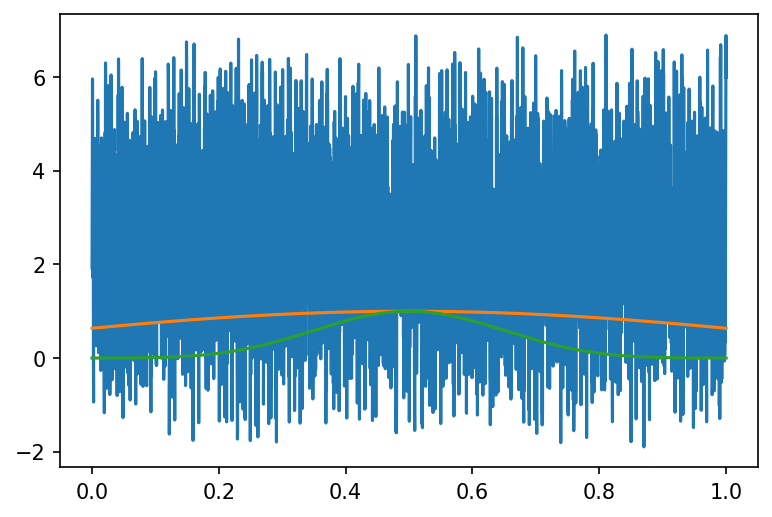

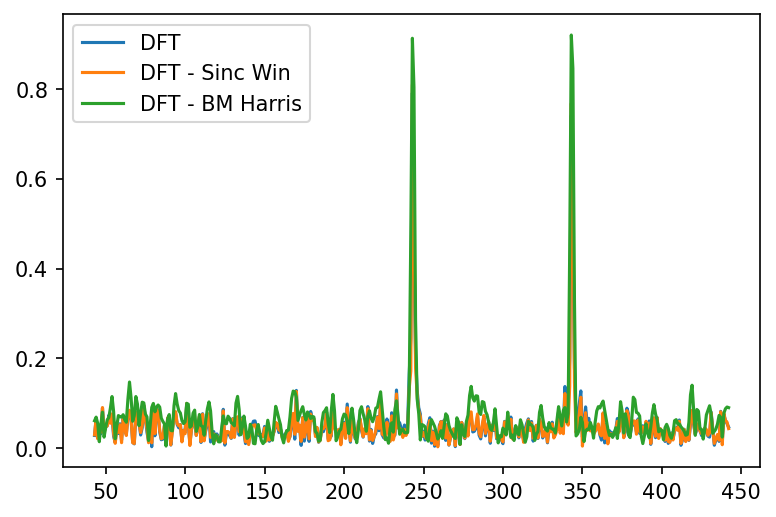

In [117]:
win = np.sinc((t - t[int(fs*L*0.5)]))
win2 = bm_h_win(np.arange(fs))

out = np.abs(DFT(s))/(t.shape[0]/2)
out2 = 2*np.abs(DFT(win*s))/(np.sum(win))
out3 = 2*np.abs(DFT(win2*s))/(np.sum(win2))
fr = np.arange(fs)

plt.plot(t, s, t, win, t, win2)
plt.show()
plt.plot(fr[int(f)-offset:int(f)+offset], out[int(f)-offset:int(f)+offset])
plt.plot(fr[int(f)-offset:int(f)+offset], out2[int(f)-offset:int(f)+offset])
plt.plot(fr[int(f)-offset:int(f)+offset], out3[int(f)-offset:int(f)+offset])
plt.legend(['DFT', 'DFT - Sinc Win', 'DFT - BM Harris'])

In [94]:
def FFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if N % 2 > 0:
        raise ValueError("Must be a power of 2")
    elif N <= 2:
        return DFT(x)
    else:
        x_even = FFT(x[::2])
        x_odd = FFT(x[1::2])
        terms = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([x_even + terms[:int(N/2)] * x_odd,
                x_even + terms[int(N/2):] * x_odd])

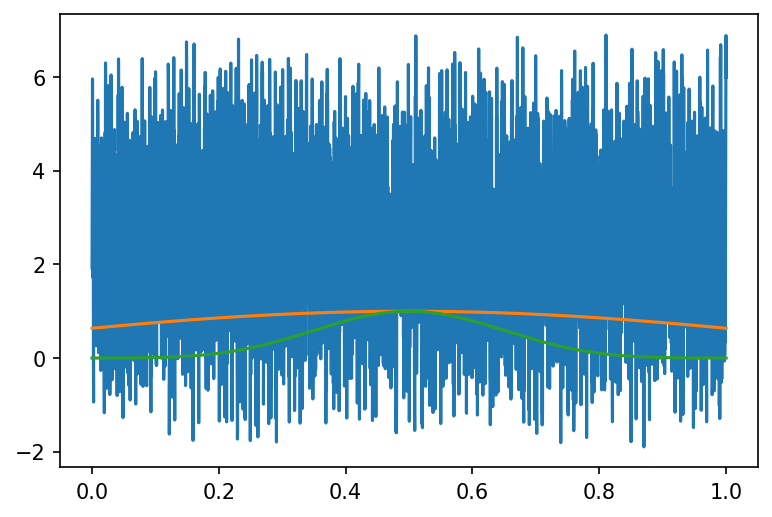

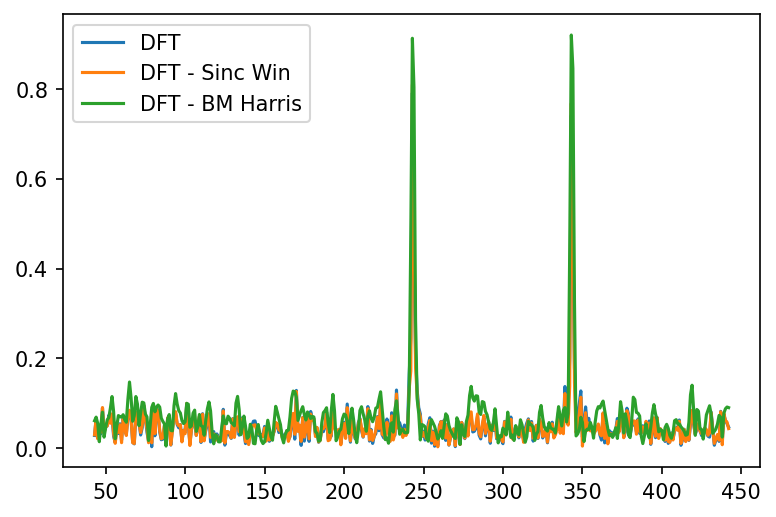

In [118]:
out = np.abs(FFT(s))/(t.shape[0]/2)
out2 = 2*np.abs(FFT(win*s))/(np.sum(win))
out3 = 2*np.abs(FFT(win2*s))/(np.sum(win2))
fr = np.arange(fs)

plt.plot(t, s, t, win, t, win2)
plt.show()
plt.plot(fr[int(f)-offset:int(f)+offset], out[int(f)-offset:int(f)+offset])
plt.plot(fr[int(f)-offset:int(f)+offset], out2[int(f)-offset:int(f)+offset])
plt.plot(fr[int(f)-offset:int(f)+offset], out3[int(f)-offset:int(f)+offset])
plt.legend(['DFT', 'DFT - Sinc Win', 'DFT - BM Harris'])